In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import rerun as rr
import sys

sys.path.append(str(b3d.get_root_path()))

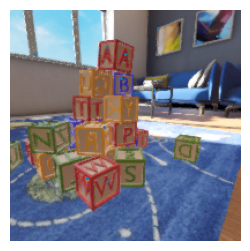

In [59]:
good_keypoint_specs = [
    {
        "file": "pan_through_plantroom.npz",
        "time0": 10,
        "good_keypoint_indices": [68, 84, 89, 213, 515, 682]
    },
    {
        "file": "pan_around_blocks.npz",
        "time0": 30,
        "good_keypoint_indices": [6, 7, 16, 58, 82, 91, 101, 188, 652, 675, 695]
    }
]

def load_ftd_with_good_keypoint_track(d):
    ftd_full = b3d.io.FeatureTrackData.load(b3d.get_assets_path() / 'mydata' / d['file'])
    return (
        ftd_full
        .slice_time(d["time0"])
        .remove_points_invisible_at_frame0()
        .slice_keypoints(jnp.array([d["good_keypoint_indices"]]))
    )

load_ftd_with_good_keypoint_track(good_keypoint_specs[1]).quick_plot(t=0, downsize=1)

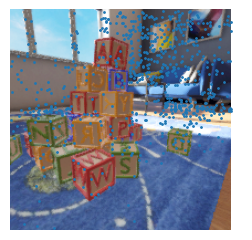

In [37]:
ftd = b3d.io.FeatureTrackData.load(b3d.get_assets_path() / 'mydata' / "pan_around_blocks.npz")
ftd.quick_plot(t=30, downsize=1)

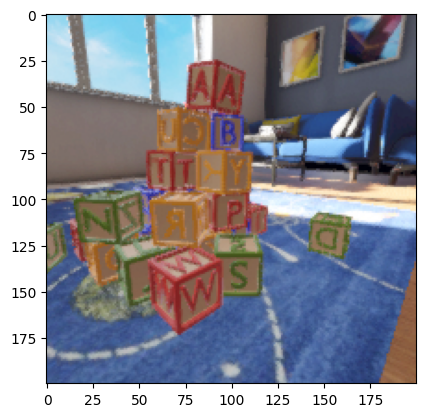

In [38]:
plt.imshow(ftd.rgb[30])

101


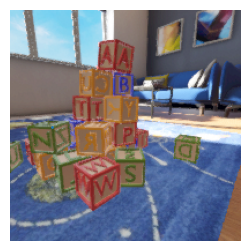

In [57]:
idx = jnp.argmin(jnp.linalg.norm((
    ftd
    .slice_time(30)
    .remove_points_invisible_at_frame0()
).observed_keypoints_positions[0, :] - jnp.array([37., 99.]), axis=1))
print(idx)

ftd.slice_time(30).remove_points_invisible_at_frame0().slice_keypoints(idx).quick_plot(t=0, downsize=1)